<a href="https://colab.research.google.com/github/utkarsh9911/Deep_learning_prac/blob/main/Regularization_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


In [100]:
# Generate a complex classification dataset
X, y = make_classification(n_samples=7000, n_features=20, n_informative=5, n_redundant=10, n_clusters_per_class=2, flip_y=0.1, random_state=42)


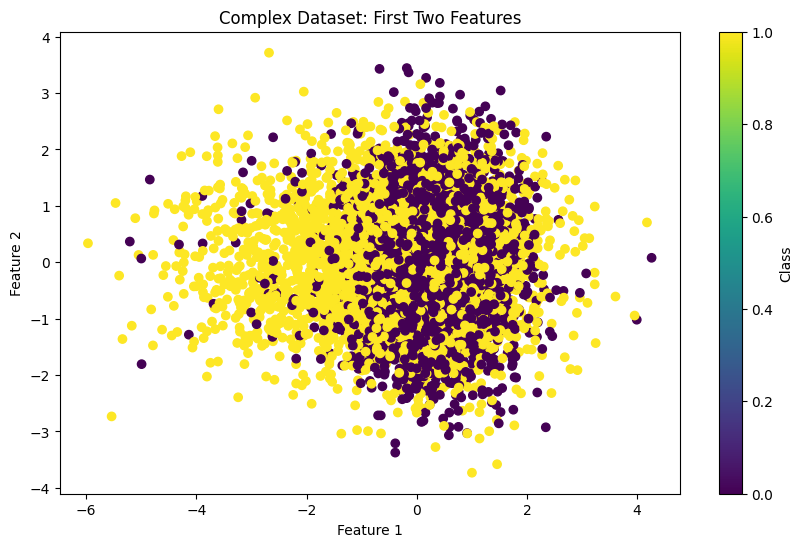

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Complex Dataset: First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

In [84]:
X

array([[-0.55569808, -1.88510943, -2.21380152, ..., -0.45889909,
         1.31274219, -0.38715106],
       [-0.3279915 , -0.03649364,  0.19990347, ..., -0.24905056,
        -0.45083045,  0.34819685],
       [-4.78868652, -1.75981338, -2.49748071, ..., -1.70106427,
        -1.54495664,  0.57208568],
       ...,
       [ 0.84320592,  3.61586154,  1.88436249, ...,  0.88789882,
         1.05126408,  0.46534399],
       [-1.4754177 ,  1.05016568, -0.81201838, ...,  1.52428486,
         0.53580393, -0.58082065],
       [-1.33300501,  0.2722246 , -1.09973557, ..., -0.65287104,
         0.50133085,  1.16072728]])

In [85]:
X.shape

(2000, 20)

In [86]:
y.shape

(2000,)

In [87]:
from threading import active_count
model1 = Sequential()
model1.add(Dense(128,input_dim=X.shape[1],activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2688      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19329 (75.50 KB)
Trainable params: 19329 (75.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [90]:
history1 = model1.fit(X,y,epochs=1000,validation_split=0.2,verbose=0)

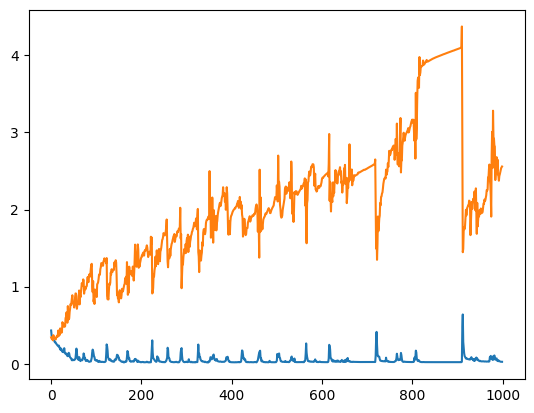

In [94]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [102]:
model2 = Sequential()

model2.add(Dense(128,input_dim=X.shape[1],activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.003)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.003)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2688      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19329 (75.50 KB)
Trainable params: 19329 (75.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [104]:
history2 = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

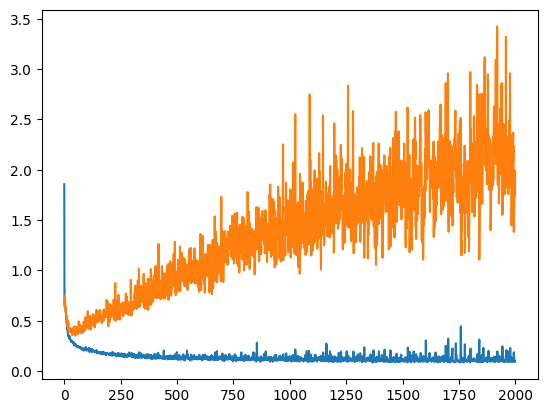

In [105]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [112]:
model1_weight_layer1 = model1.get_weights()[0].reshape(2560)
model1_weight_layer2 = model2.get_weights()[0].reshape(2560)

In [110]:
model1_weight_layer1.shape

(20, 128)

<Axes: >

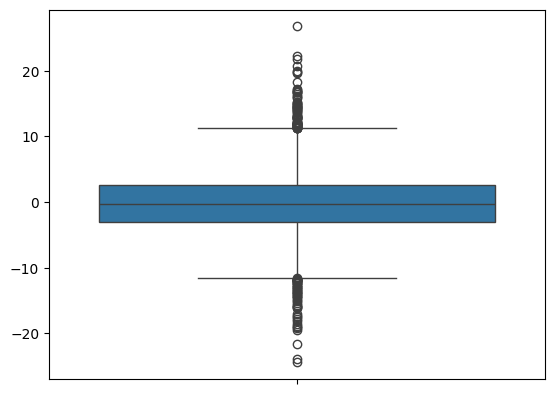

In [113]:
sns.boxplot(model1_weight_layer1)

<Axes: >

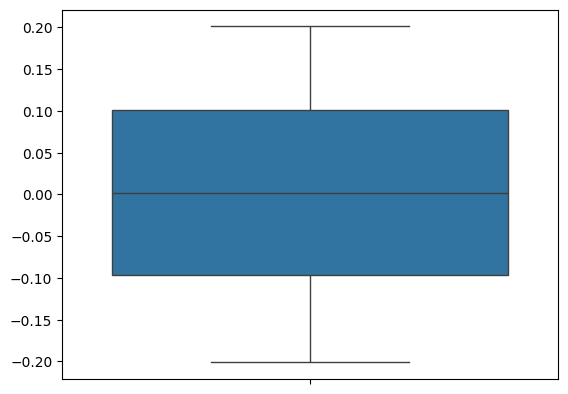

In [114]:
sns.boxplot(model1_weight_layer2)

In [116]:
model1_weight_layer1.min()

-24.404514

In [117]:
model1_weight_layer2.min()

-0.20127548

In [121]:
model1_weight_layer2.max()

0.2012848

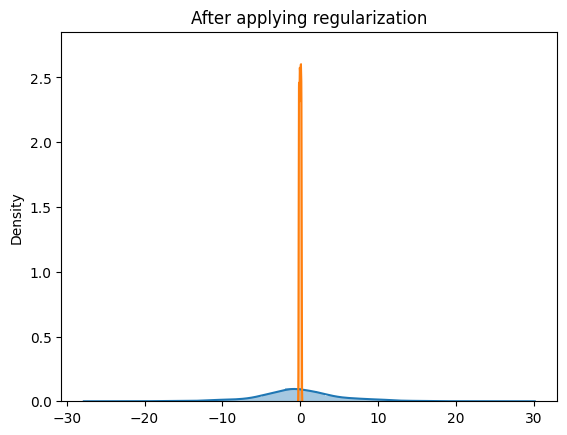

In [125]:
sns.distplot(model1_weight_layer1)
sns.distplot(model1_weight_layer2)
plt.title("After applying regularization")
plt.show()